In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

In [198]:
df=pd.read_csv("../data/netflix_reviews.csv")
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,020e683f-4f1b-4607-b486-e6aac09ddaf3,april Balay,super excited movie enjoy super,5,0,NaN,2026-01-23 10:35:09,NaN
1,0ae2bcc5-74ba-4e5d-adb5-3e0b5b45839f,Jhinro Cabanada,no resolution choice,1,0,9.49.1 build 6 63792,2026-01-23 09:59:06,9.49.1 build 6 63792
2,2c64dec4-6520-4962-baeb-e1a3244a4217,Satish Pandey,Good app but very expensive and also needs imp...,5,0,9.49.1 build 6 63792,2026-01-23 09:41:07,9.49.1 build 6 63792
3,b6eda391-b5ac-4981-9f8f-60c416eb329e,Chris Hinton,Cast to TV option has been removed.,1,0,9.49.1 build 6 63792,2026-01-23 09:35:09,9.49.1 build 6 63792
4,d70b7712-4042-4566-90b7-cfde61f6f586,Matthew Smallwood,Would be great if I wasn't cut off in the midd...,1,0,9.49.1 build 6 63792,2026-01-23 09:29:16,9.49.1 build 6 63792


In [199]:
missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)

missing_summary


,missing_count,missing_percent
appVersion,25637,17.604323
reviewCreatedVersion,25637,17.604323
content,6,0.004120
userName,2,0.001373
score,0,0.000000
reviewId,0,0.000000
thumbsUpCount,0,0.000000
at,0,0.000000


In [200]:
df = df.dropna(subset=['content', 'userName'])
df[['content', 'userName']].isnull().sum()

content     0
userName    0
dtype: int64

In [201]:
cols_to_drop = ['reviewCreatedVersion', 'appVersion']
df = df.drop(columns=cols_to_drop)
df

,reviewId,userName,content,score,thumbsUpCount,at
0,020e683f-4f1b-4607-b486-e6aac09ddaf3,april Balay,super excited movie enjoy super,5,0,2026-01-23 10:35:09
1,0ae2bcc5-74ba-4e5d-adb5-3e0b5b45839f,Jhinro Cabanada,no resolution choice,1,0,2026-01-23 09:59:06
2,2c64dec4-6520-4962-baeb-e1a3244a4217,Satish Pandey,Good app but very expensive and also needs imp...,5,0,2026-01-23 09:41:07
3,b6eda391-b5ac-4981-9f8f-60c416eb329e,Chris Hinton,Cast to TV option has been removed.,1,0,2026-01-23 09:35:09
4,d70b7712-4042-4566-90b7-cfde61f6f586,Matthew Smallwood,Would be great if I wasn't cut off in the midd...,1,0,2026-01-23 09:29:16
...,...,...,...,...,...,...
145624,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03
145625,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30
145626,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58
145627,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42


In [202]:
df.isnull().sum()


reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [203]:
df.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 145621
Number of columns: 6


In [204]:
column_descriptions = {
    'reviewId': 'Unique identifier for each review',
    'userName': 'Username of the reviewer',
    'content': 'Text content of the user review',
    'score': 'User rating (1 to 5)',
    'thumbsUpCount': 'Number of likes received by the review',
    'at': 'Timestamp when the review was posted',
    'year': 'Year when the review was posted',
    'review_length': 'Length of the review text in characters'
}

pd.DataFrame.from_dict(column_descriptions, orient='index', columns=['Description'])

,Description
reviewId,Unique identifier for each review
userName,Username of the reviewer
content,Text content of the user review
score,User rating (1 to 5)
thumbsUpCount,Number of likes received by the review
at,Timestamp when the review was posted
year,Year when the review was posted
review_length,Length of the review text in characters


In [205]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewId,145621,144140,ef9bf390-40f4-4c18-8726-fa2246c83a36,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userName,145621,109480,A Google user,30280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content,145621,138254,Good,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,145621.0,NaN,NaN,NaN,2.868048,1.733861,1.0,1.0,3.0,5.0,5.0
thumbsUpCount,145621.0,NaN,NaN,NaN,8.379107,90.529719,0.0,0.0,0.0,1.0,8032.0
at,145621,145247,2024-05-17 05:51:45,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
df.nunique().sort_values(ascending=False)

at               145247
reviewId         144140
content          138254
userName         109480
thumbsUpCount       911
score                 5
dtype: int64

In [207]:
score_counts = df['score'].value_counts().sort_index()
score_counts

score
1    57061
2    12756
3    13964
4    16017
5    45823
Name: count, dtype: int64

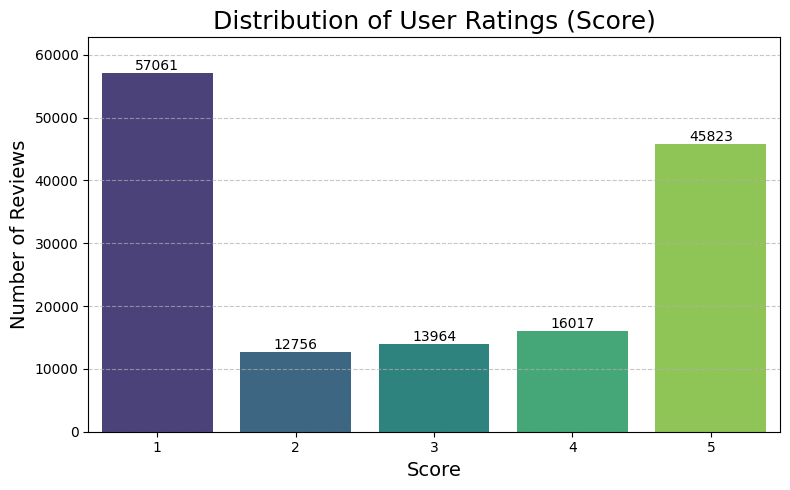

In [208]:
score_df = score_counts.reset_index()
score_df.columns = ['score', 'count']

plt.figure(figsize=(8,5))
colors = sns.color_palette("viridis", len(score_df))

ax = sns.barplot(
    data=score_df,
    x='score',
    y='count',
    hue='score',    
    palette=colors,
    dodge=False,
    legend=False
)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Distribution of User Ratings (Score)", size=18)
plt.xlabel("Score", size=14)
plt.ylabel("Number of Reviews", size=14)
plt.ylim(0, score_df['count'].max()*1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [209]:
high_low_ratio = score_counts[5] / score_counts[1]
print(f"Ratio of 5-star to 1-star reviews: {high_low_ratio:.2f}")


Ratio of 5-star to 1-star reviews: 0.80


Reviews increased by -3815 from 2018 to 2026


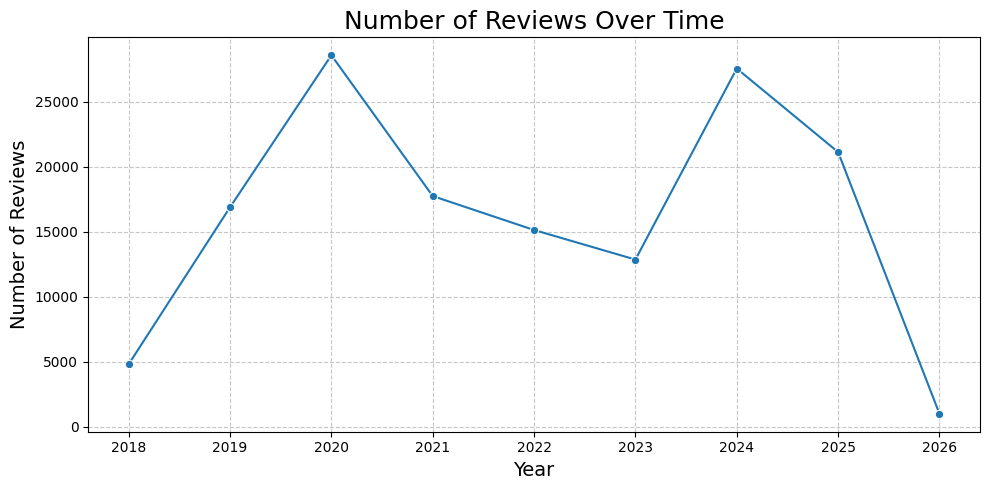

In [210]:
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
yearly_reviews = df.groupby('year').size().reset_index(name='review_count')

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_reviews, x='year', y='review_count', marker='o')
plt.title("Number of Reviews Over Time", size=18)
plt.xlabel("Year", size=14)
plt.ylabel("Number of Reviews", size=14)
plt.grid(True, linestyle='--', alpha=0.7)

total_years = yearly_reviews['year'].max() - yearly_reviews['year'].min()
if total_years > 0:
    change = yearly_reviews['review_count'].iloc[-1] - yearly_reviews['review_count'].iloc[0]
    print(f"Reviews increased by {change} from {yearly_reviews['year'].iloc[0]} to {yearly_reviews['year'].iloc[-1]}")

plt.tight_layout()
plt.show()

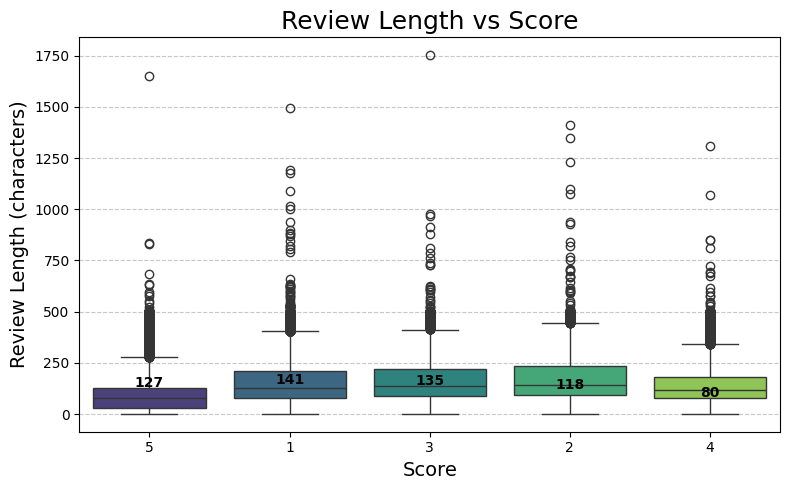

Average review length per score:
score
1    160.133278
2    179.420900
3    171.051275
4    146.436723
5     97.924710
Name: review_length, dtype: float64


In [211]:
df['review_length'] = df['content'].astype(str).apply(len)
df_box = df[['score','review_length']].copy()
df_box['score'] = df_box['score'].astype(str)  

plt.figure(figsize=(8,5))

ax = sns.boxplot(
    data=df_box,
    x='score',
    y='review_length',
    hue='score',       
    palette="viridis",
    dodge=False,
    legend=False
)

medians = df.groupby('score')['review_length'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 5, f'{int(median)}', 
            horizontalalignment='center', color='black', weight='semibold')

plt.title("Review Length vs Score", size=18)
plt.xlabel("Score", size=14)
plt.ylabel("Review Length (characters)", size=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

avg_length_per_score = df.groupby('score')['review_length'].mean()
print("Average review length per score:")
print(avg_length_per_score)


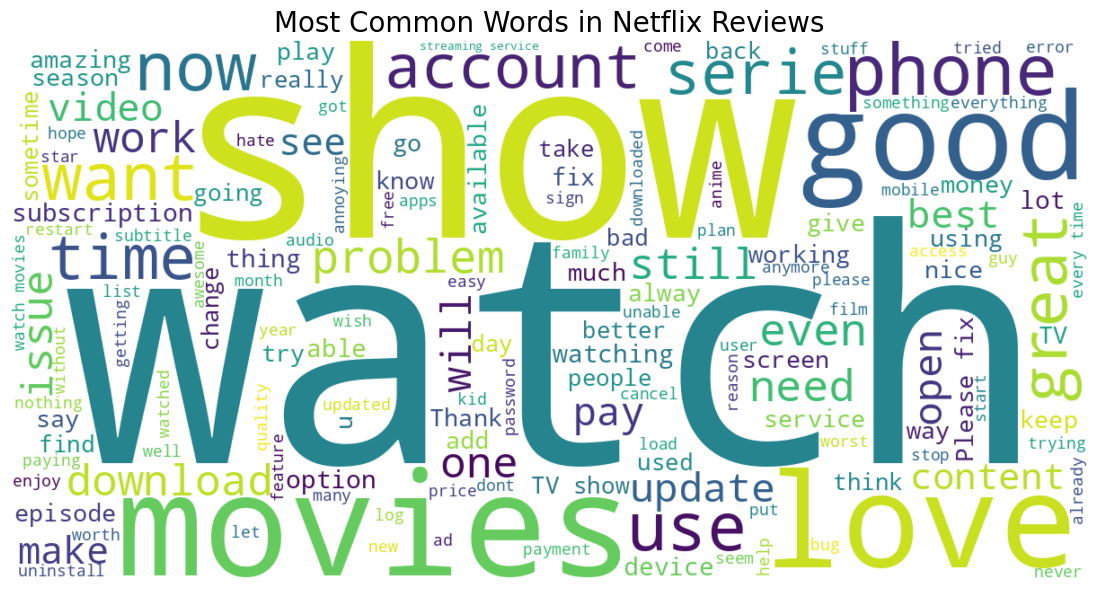

In [212]:
stopwords = set(STOPWORDS)
stopwords.update(["app", "movie", "netflix"]) 

text = " ".join(df['content'].astype(str))

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    width=1200,
    height=600,
    max_words=150,
    colormap='viridis',    
    contour_width=1,
    contour_color='steelblue'
).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Reviews", size=20)
plt.show()

In [213]:
df['sentiment'] = df['score'].apply(
    lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral'
)

df['sentiment'].value_counts()


sentiment
negative    69817
positive    61840
neutral     13964
Name: count, dtype: int64

In [214]:
top_reviews = df[df['score'] == 5].sort_values(by='thumbsUpCount', ascending=False).head(10)
top_reviews[['userName', 'content', 'thumbsUpCount']]


,userName,content,thumbsUpCount
51513,A Google user,Wow! To be able to have Netflix on my phone is...,8032
49128,A Google user,"Watching NETFLIX right now, it always updates ...",7052
38932,LJ Downs (LJ),"Netflix is the first app I bought. Movies,seri...",3183
58258,A Google user,The reason I rate this app a 5 star is because...,3003
64933,A Google user,In love with this app. Awsome shows which is d...,2829
47759,A Google user,"Worth the money, for sure. Great source of not...",2701
57255,A Google user,OMG!!!! this is the best so many new shows fro...,2597
57063,A Google user,Feels like I'm the last person on Earth to cav...,2370
44081,A Google user,Netflix is a great (and free to download!) app...,2214
43322,Celestine Akebor,It's a very nice app. It very interactive and ...,2048


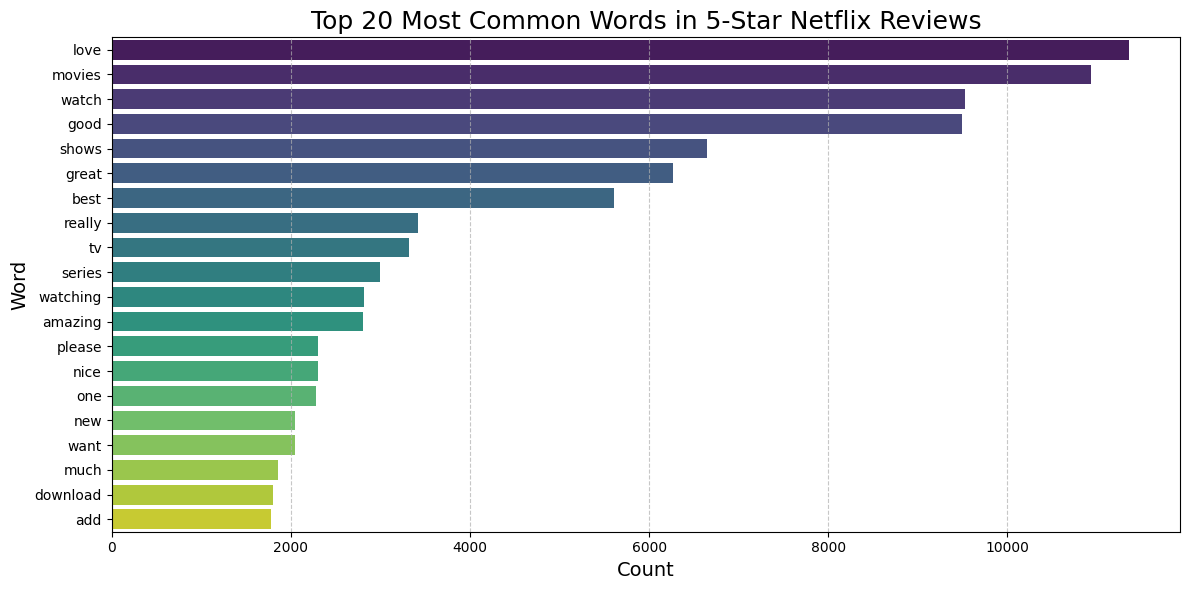

In [215]:
stopwords = set(STOPWORDS)
stopwords.update(["app", "movie", "netflix"]) 

top_text = " ".join(df[df['score']==5]['content'].astype(str))

words = [word.lower() for word in top_text.split() if word.lower() not in stopwords]
most_common_words = Counter(words).most_common(20)

top_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=top_words_df,
    x='count',
    y='word',
    hue='word',     
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title("Top 20 Most Common Words in 5-Star Netflix Reviews", size=18)
plt.xlabel("Count", size=14)
plt.ylabel("Word", size=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()